In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HomeC_Device.csv')
df

,time,Barn_r,Barn_p,Dishwasher_r,Dishwasher_p,Fridge_r,Fridge_p,Furnace_r,Furnace_p,Garage door_r,...,Well_r,Well_p,Wine cellar_r,Wine cellar_p,month,day,weekday,hour,minute,fare
0,2016-11-01 00:01:00,0.029750,0.025337,0.000000,-0.006463,0.005400,0.008750,0.088783,0.087916,0.039867,...,0.001000,0.013481,0.007933,0.006773,11,1,Tuesday,0,1,153.0
1,2016-11-01 00:02:00,0.029733,0.025807,0.000000,-0.006290,0.005033,0.008470,0.141400,0.156919,0.033667,...,0.001000,0.013835,0.007917,0.006821,11,1,Tuesday,0,2,153.0
2,2016-11-01 00:03:00,0.029533,0.025576,0.000017,-0.006267,0.005067,0.008500,0.201750,0.235353,0.013200,...,0.001000,0.013835,0.007933,0.006838,11,1,Tuesday,0,3,153.0
3,2016-11-01 00:04:00,0.029333,0.025345,0.000100,-0.006155,0.005333,0.008742,0.691767,0.648559,0.013483,...,0.000967,0.013528,0.008367,0.007273,11,1,Tuesday,0,4,153.0
4,2016-11-01 00:05:00,0.029400,0.025422,0.000100,-0.006155,0.005300,0.008711,0.662050,0.620258,0.013450,...,0.001000,0.013835,0.008317,0.007223,11,1,Tuesday,0,5,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43194,2016-11-30 23:55:00,0.029967,0.023220,0.000017,-0.004931,0.121600,0.120958,0.086767,0.083554,0.013167,...,0.000983,0.011599,0.007750,0.006671,11,30,Wednesday,23,55,153.0
43195,2016-11-30 23:56:00,0.030017,0.023276,0.000017,-0.004931,0.121267,0.120613,0.086267,0.082856,0.013183,...,0.001000,0.011753,0.007750,0.006671,11,30,Wednesday,23,56,153.0
43196,2016-11-30 23:57:00,0.029900,0.023145,0.000017,-0.004931,0.121683,0.121045,0.084800,0.080806,0.013167,...,0.000950,0.011291,0.007983,0.006906,11,30,Wednesday,23,57,153.0
43197,2016-11-30 23:58:00,0.029900,0.023145,0.000017,-0.004931,0.121117,0.120458,0.085950,0.082413,0.013183,...,0.000967,0.011444,0.007700,0.006621,11,30,Wednesday,23,58,153.0


In [3]:
df.set_index('time',inplace=True)
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2016-11-01 00:01:00', '2016-11-01 00:02:00',
               '2016-11-01 00:03:00', '2016-11-01 00:04:00',
               '2016-11-01 00:05:00', '2016-11-01 00:06:00',
               '2016-11-01 00:07:00', '2016-11-01 00:08:00',
               '2016-11-01 00:09:00', '2016-11-01 00:10:00',
               ...
               '2016-11-30 23:50:00', '2016-11-30 23:51:00',
               '2016-11-30 23:52:00', '2016-11-30 23:53:00',
               '2016-11-30 23:54:00', '2016-11-30 23:55:00',
               '2016-11-30 23:56:00', '2016-11-30 23:57:00',
               '2016-11-30 23:58:00', '2016-11-30 23:59:00'],
              dtype='datetime64[ns]', name='time', length=43199, freq=None)

In [4]:
# 1분
df_p = df.iloc[:,[i for i in range(1,25,2)]]
df_p

,Barn_p,Dishwasher_p,Fridge_p,Furnace_p,Garage door_p,Home office_p,Kitchen_p,Living room_p,Microwave_p,Solar_p,Well_p,Wine cellar_p
time,,,,,,,,,,,,
2016-11-01 00:01:00,0.025337,-0.006463,0.008750,0.087916,0.042479,0.167406,-0.001395,0.002058,0.001758,0.385787,0.013481,0.006773
2016-11-01 00:02:00,0.025807,-0.006290,0.008470,0.156919,0.036433,0.165267,-0.000902,0.001721,0.001565,0.384670,0.013835,0.006821
2016-11-01 00:03:00,0.025576,-0.006267,0.008500,0.235353,0.013274,0.163328,-0.000955,0.001614,0.001473,0.384825,0.013835,0.006838
2016-11-01 00:04:00,0.025345,-0.006155,0.008742,0.648559,0.013604,0.164950,-0.000875,0.001640,0.001382,0.382497,0.013528,0.007273
2016-11-01 00:05:00,0.025422,-0.006155,0.008711,0.620258,0.013566,0.164431,-0.000928,0.001479,0.001382,0.382481,0.013835,0.007223
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30 23:55:00,0.023220,-0.004931,0.120958,0.083554,0.012597,0.552404,0.000463,0.013228,0.001146,0.015165,0.011599,0.006671
2016-11-30 23:56:00,0.023276,-0.004931,0.120613,0.082856,0.012617,0.552199,0.000409,0.013504,0.001189,0.014911,0.011753,0.006671
2016-11-30 23:57:00,0.023145,-0.004931,0.121045,0.080806,0.012597,0.531886,0.000436,0.013378,0.001146,0.014674,0.011291,0.006906


In [5]:
cols = ['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p']

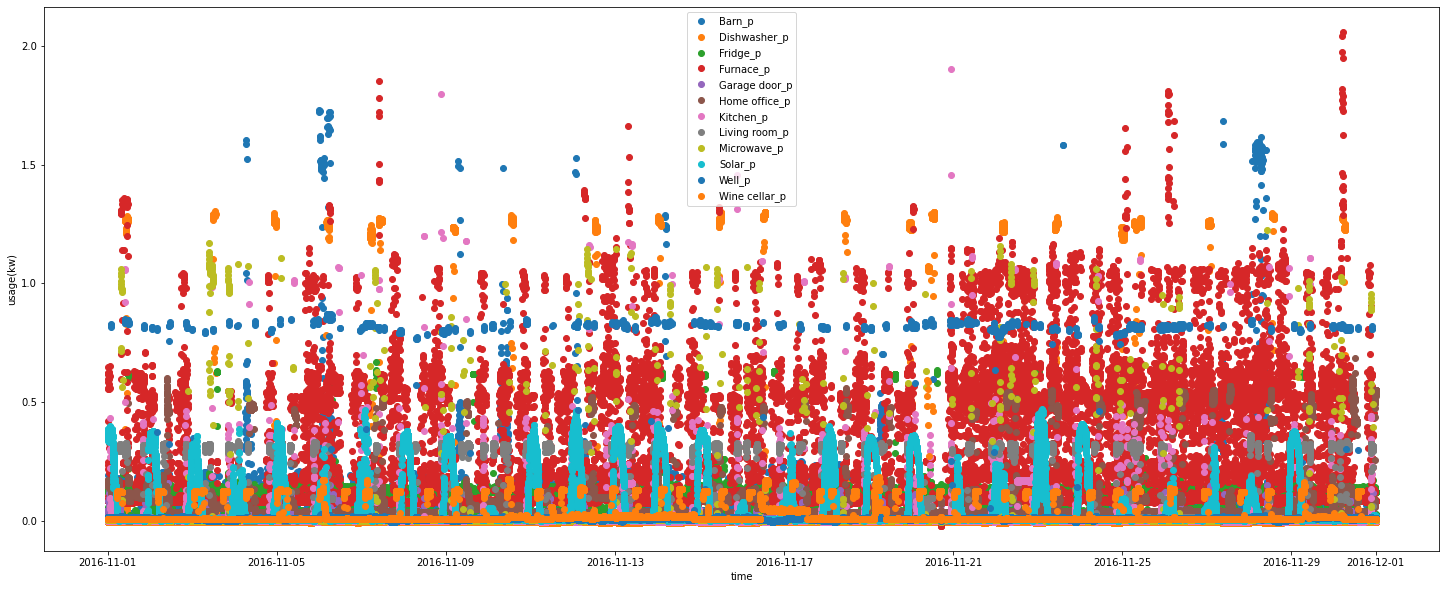

In [6]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot_date(df_p.index, df_p)
plt.xlabel("time")
plt.ylabel("usage(kw)")
ax.legend(('Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p'))

In [7]:
from tslearn.clustering import TimeSeriesKMeans

In [13]:
col = 'Living room_p'
series_spec = df_p[col]
series_spec.values

array([0.00205829, 0.00172118, 0.00161353, ..., 0.01337827, 0.01330297,
       0.01342844])

In [14]:
series_fit = series_spec.values.reshape(-1,1)
series_fit.shape
series_fit

array([[0.00205829],
       [0.00172118],
       [0.00161353],
       ...,
       [0.01337827],
       [0.01330297],
       [0.01342844]])

In [15]:
model = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=10, verbose=1)
y_pred = model.fit_predict(series_fit)

0.000 --> 0.000 --> 0.000 --> 


In [16]:
# 군집의 center 얼마나 뭉쳤는지 확인
# 작을 수록 잘 뭉침
print(f'Inertia: {model.inertia_}')
# 각 군집의 center 값 확인
print(f'cluster_center {model.cluster_centers_}')
# series -> dataframe
df_spec = series_spec.to_frame(name=col)
# clustering label 삽입
df_spec['cluster'] = y_pred
df_spec

Inertia: 0.00044323739993105726
cluster_center [[[0.0082115 ]]

 [[0.31265004]]]


,Living room_p,cluster
time,,
2016-11-01 00:01:00,0.002058,0
2016-11-01 00:02:00,0.001721,0
2016-11-01 00:03:00,0.001614,0
2016-11-01 00:04:00,0.001640,0
2016-11-01 00:05:00,0.001479,0
...,...,...
2016-11-30 23:55:00,0.013228,0
2016-11-30 23:56:00,0.013504,0
2016-11-30 23:57:00,0.013378,0


In [17]:
# 1일 데이터 추출
day_1 = 1440
df_spec_time = df_spec[(day_1):(day_1*2)]
df_spec_time

,Living room_p,cluster
time,,
2016-11-02 00:01:00,0.001546,0
2016-11-02 00:02:00,0.001439,0
2016-11-02 00:03:00,0.001359,0
2016-11-02 00:04:00,0.001412,0
2016-11-02 00:05:00,0.001466,0
...,...,...
2016-11-02 23:56:00,0.001595,0
2016-11-02 23:57:00,0.001226,0
2016-11-02 23:58:00,0.001542,0


In [18]:
label_0 = df_spec_time.loc[df_spec_time.cluster==0].index
label_1 = df_spec_time.loc[df_spec_time.cluster==1].index

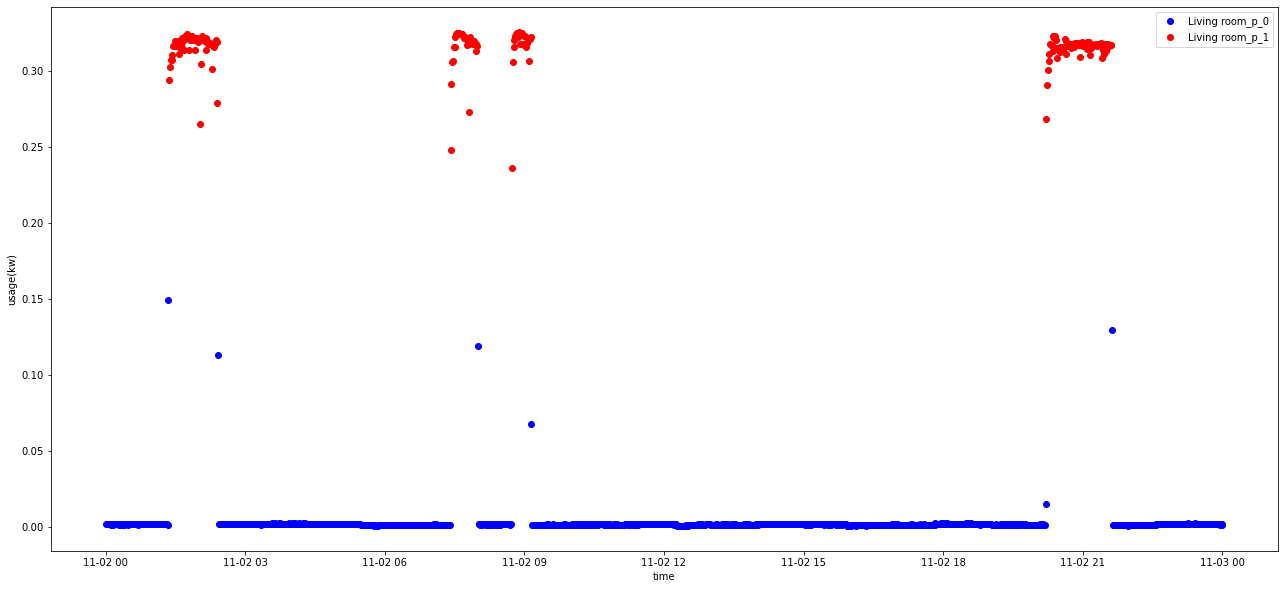

In [19]:
# 시각화
fig, ax = plt.subplots(figsize=(22, 10))
ax.plot_date(label_0, df_spec_time[col][label_0], label=f'{col}_0', c='blue')
ax.plot_date(label_1, df_spec_time[col][label_1], label=f'{col}_1', c='red')
plt.xlabel("time")
plt.ylabel("usage(kw)")
ax.legend()

In [20]:
cols = ['Barn_p', 'Dishwasher_p', 'Fridge_p', 'Furnace_p', 'Garage door_p',
       'Home office_p', 'Kitchen_p', 'Living room_p', 'Microwave_p', 'Solar_p',
       'Well_p', 'Wine cellar_p']

# model
model = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=10, n_jobs=6, verbose=1)

# 1일 데이터 추출
day_1 = 1440

# 기기별 y_pred Dict
y_pred_dict = {}

0.004 --> 0.004 --> 0.004 --> 0.004 --> 
Barn_p_cluster_center [[[0.04852077]]

 [[1.37974193]]]
0.001 --> 0.001 --> 0.001 --> 
Dishwasher_p_cluster_center [[[-0.00157333]]

 [[ 1.22738335]]]
0.001 --> 0.001 --> 0.001 --> 
Fridge_p_cluster_center [[[0.00959654]]

 [[0.13264703]]]
0.015 --> 0.014 --> 0.014 --> 0.014 --> 0.014 --> 
Furnace_p_cluster_center [[[0.10360277]]

 [[0.63683124]]]
0.000 --> 0.000 --> 0.000 --> 
Garage door_p_cluster_center [[[0.01328698]]

 [[0.08161683]]]
0.002 --> 0.001 --> 0.001 --> 
Home office_p_cluster_center [[[0.05397498]]

 [[0.47474828]]]
0.002 --> 0.002 --> 0.002 --> 
Kitchen_p_cluster_center [[[-0.00105485]]

 [[ 0.2432326 ]]]
0.000 --> 0.000 --> 0.000 --> 
Living room_p_cluster_center [[[0.0082115 ]]

 [[0.31265004]]]
0.001 --> 0.001 --> 0.001 --> 
Microwave_p_cluster_center [[[0.00309023]]

 [[0.76904523]]]
0.002 --> 0.001 --> 0.001 --> 0.001 --> 
Solar_p_cluster_center [[[0.01578452]]

 [[0.30621288]]]
0.000 --> 0.000 --> 0.000 --> 
Well_p_cluster

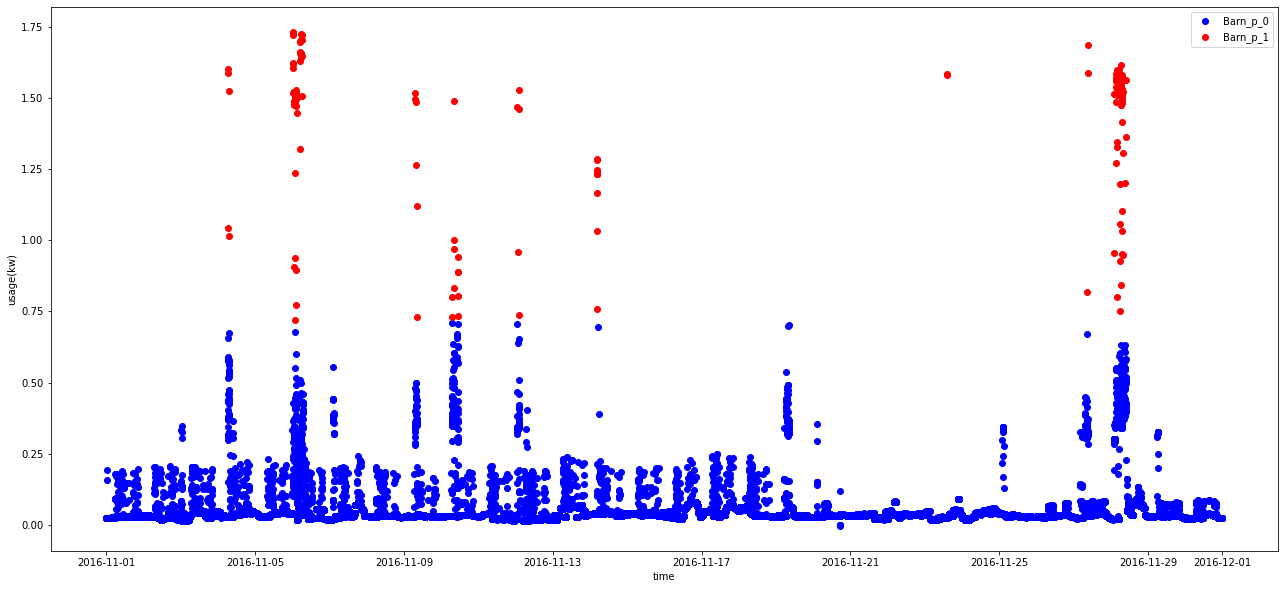

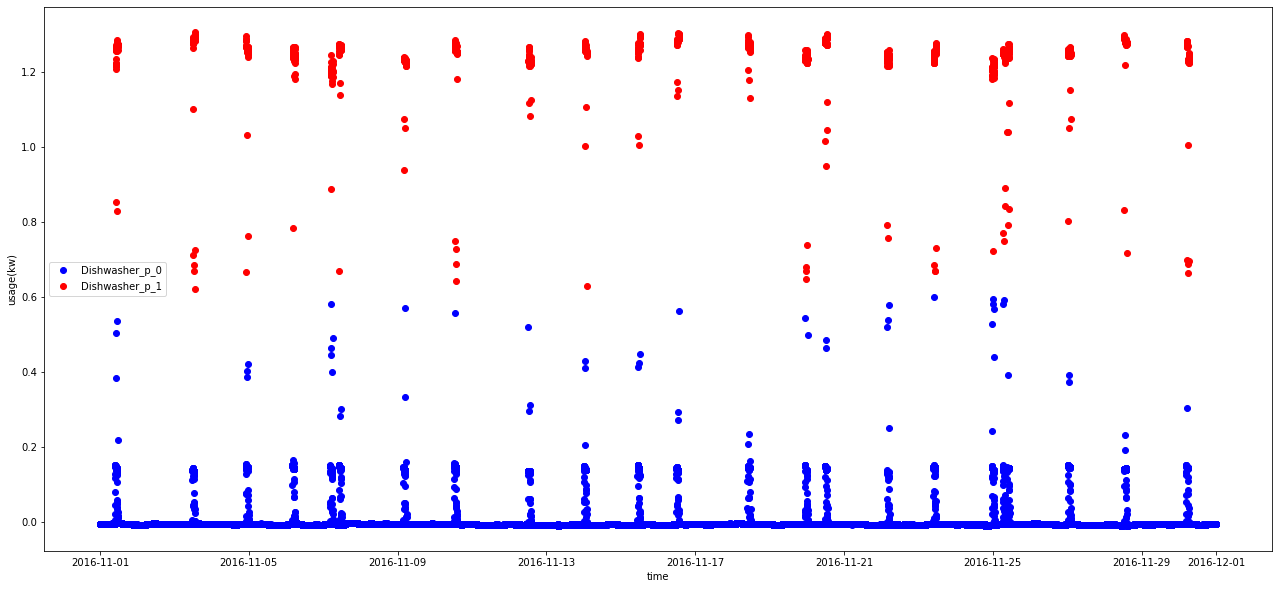

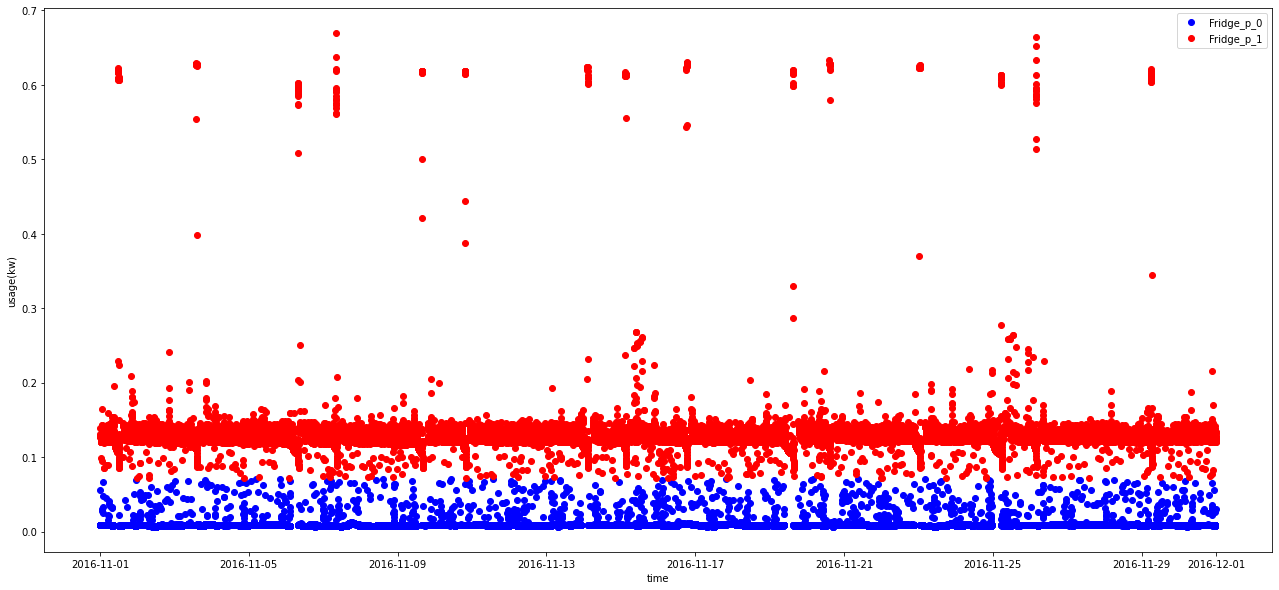

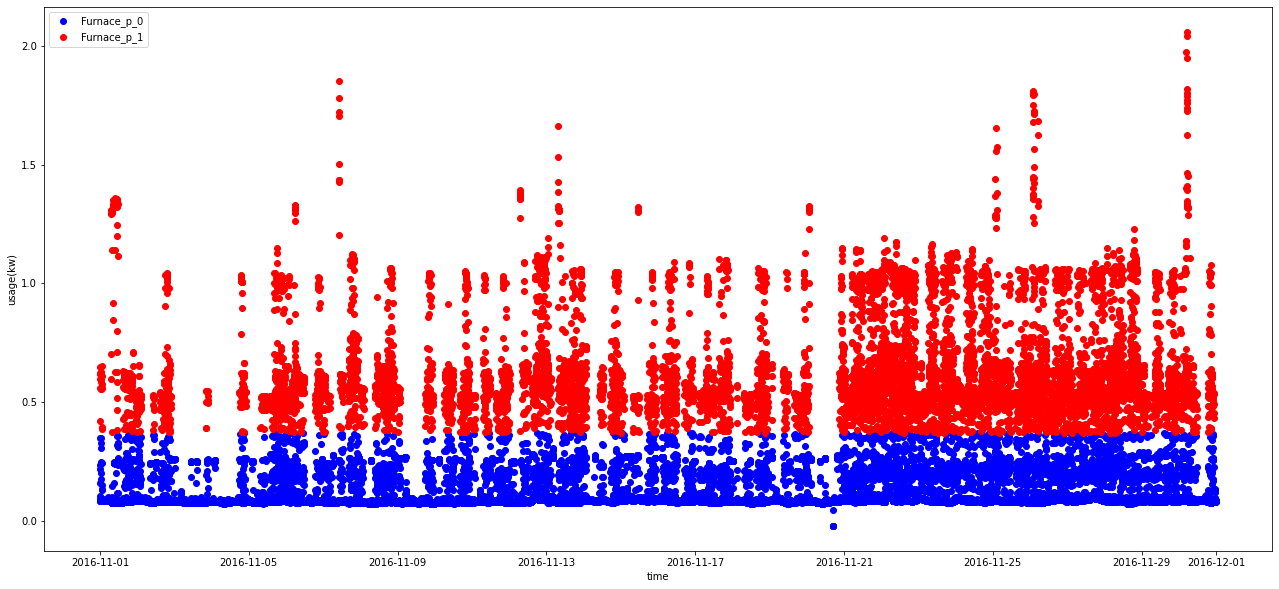

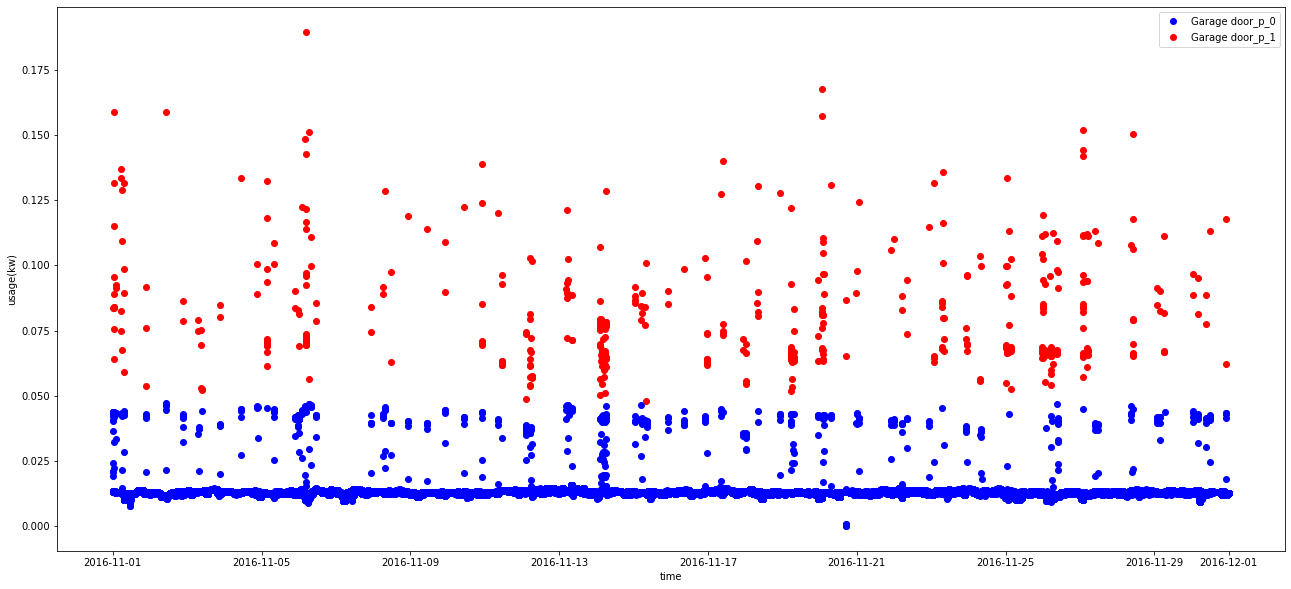

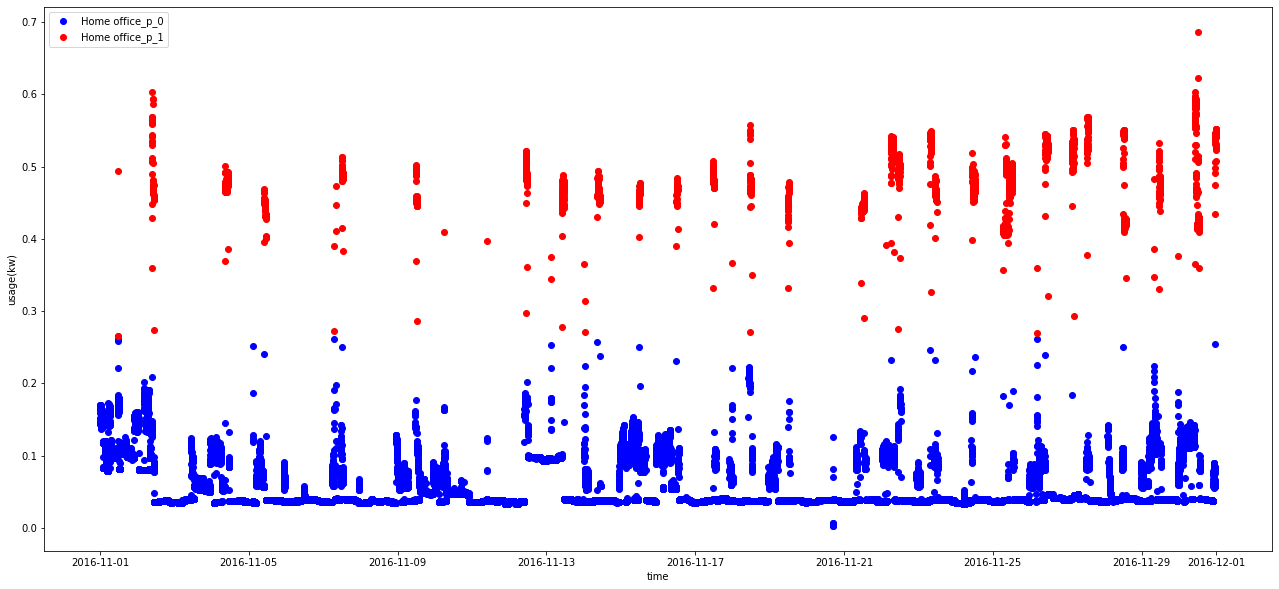

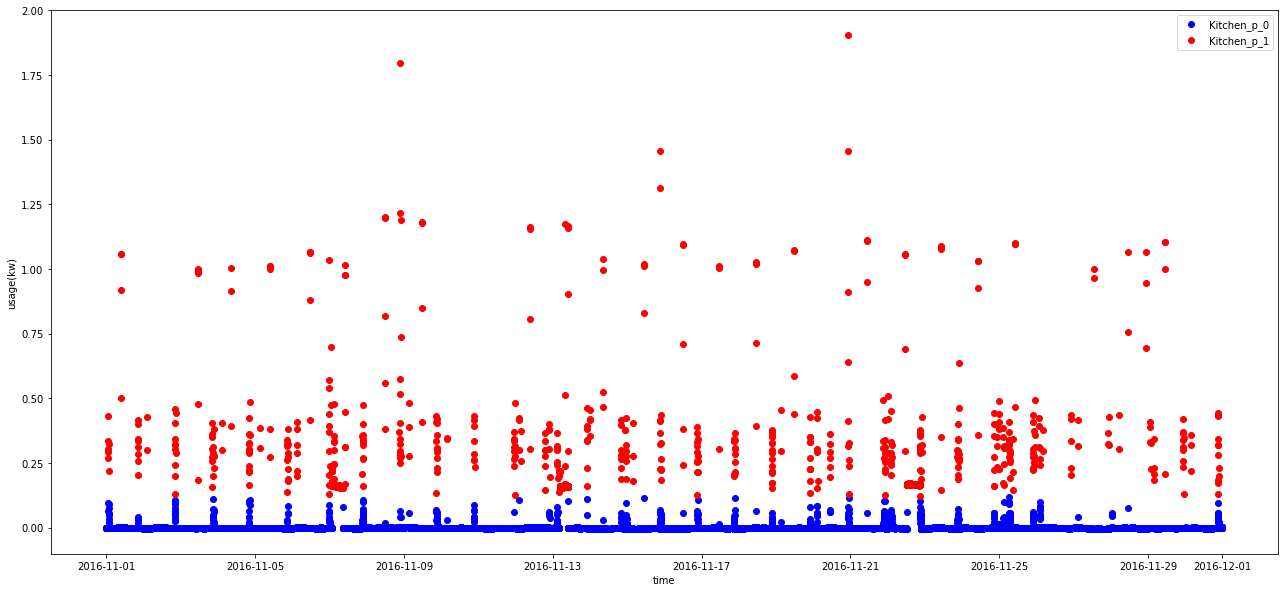

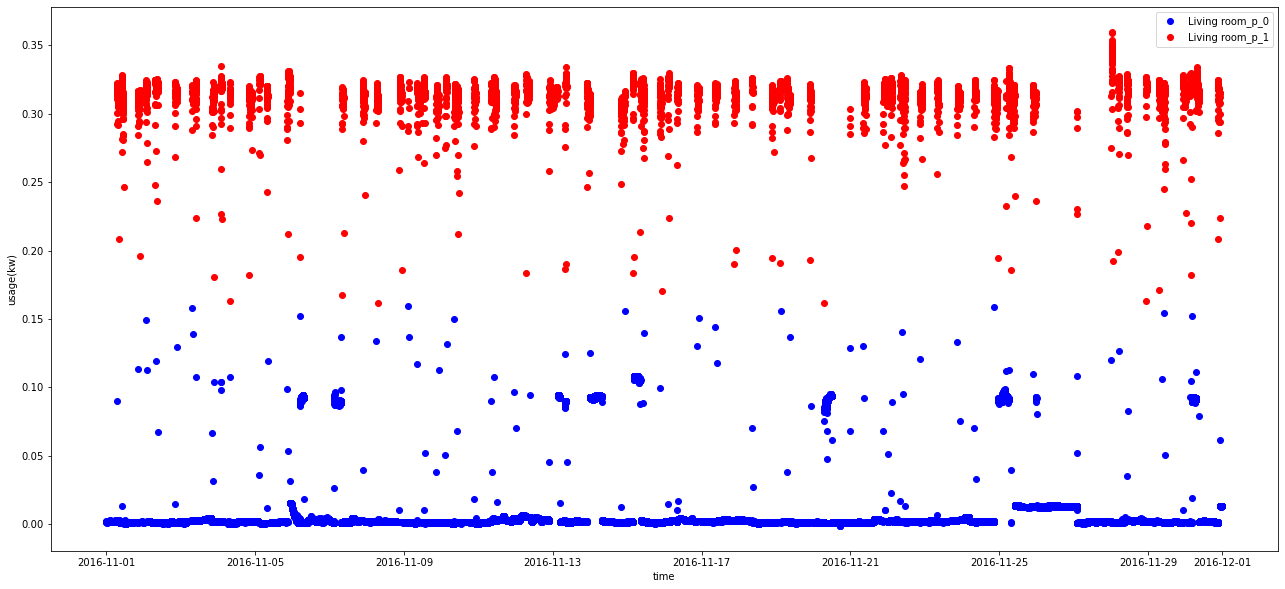

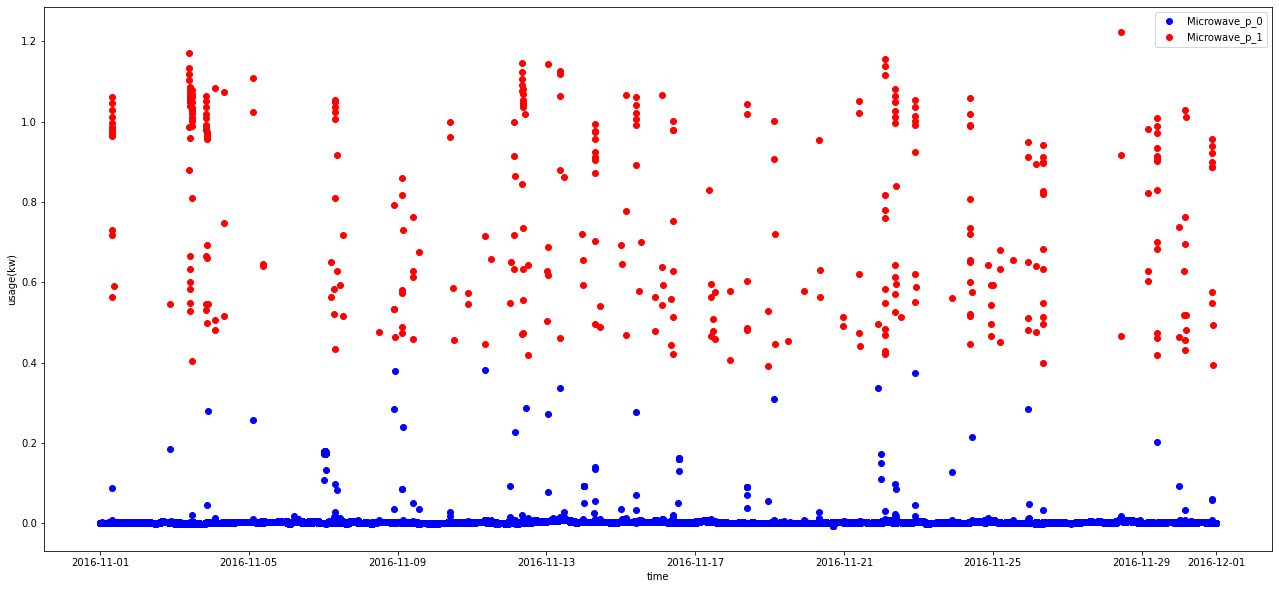

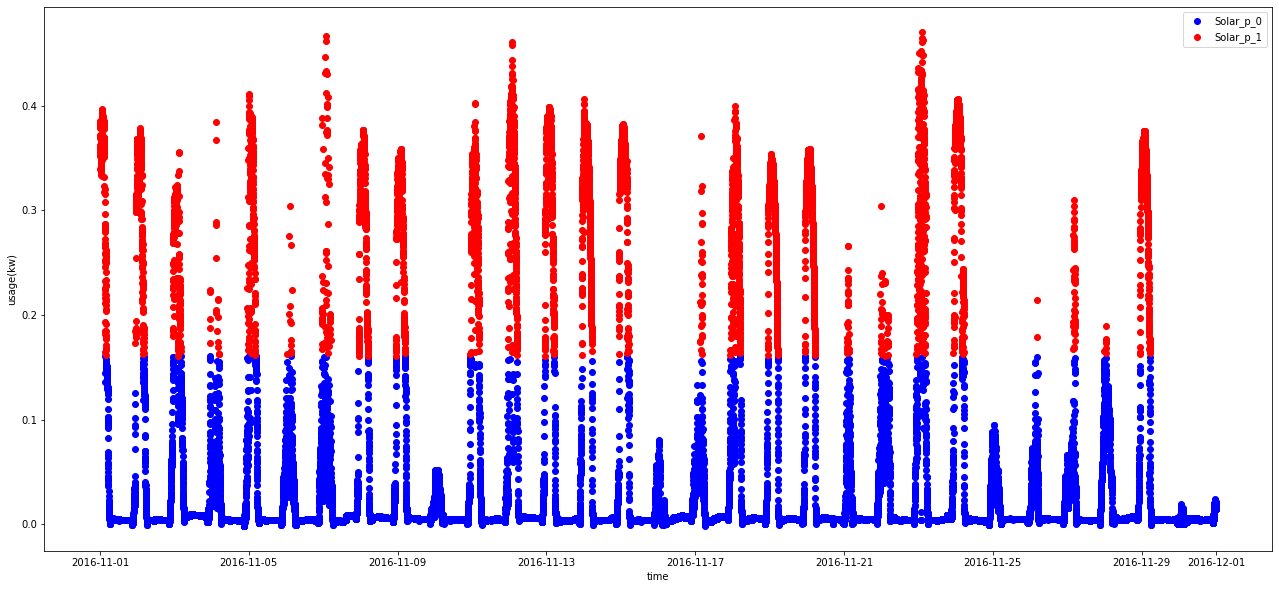

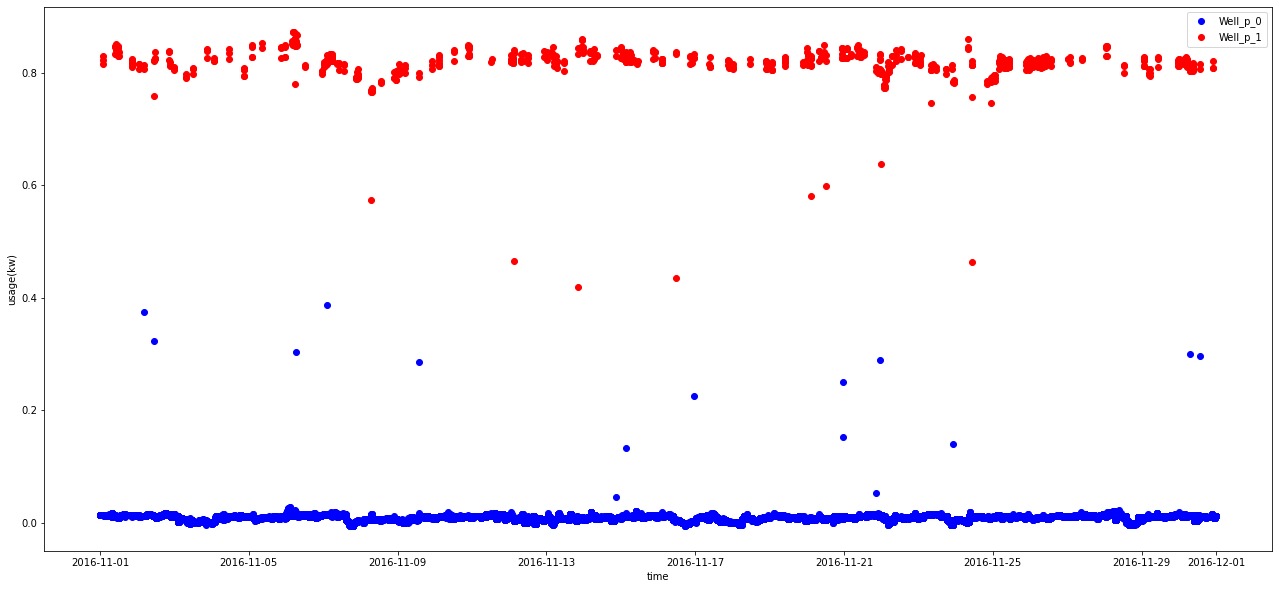

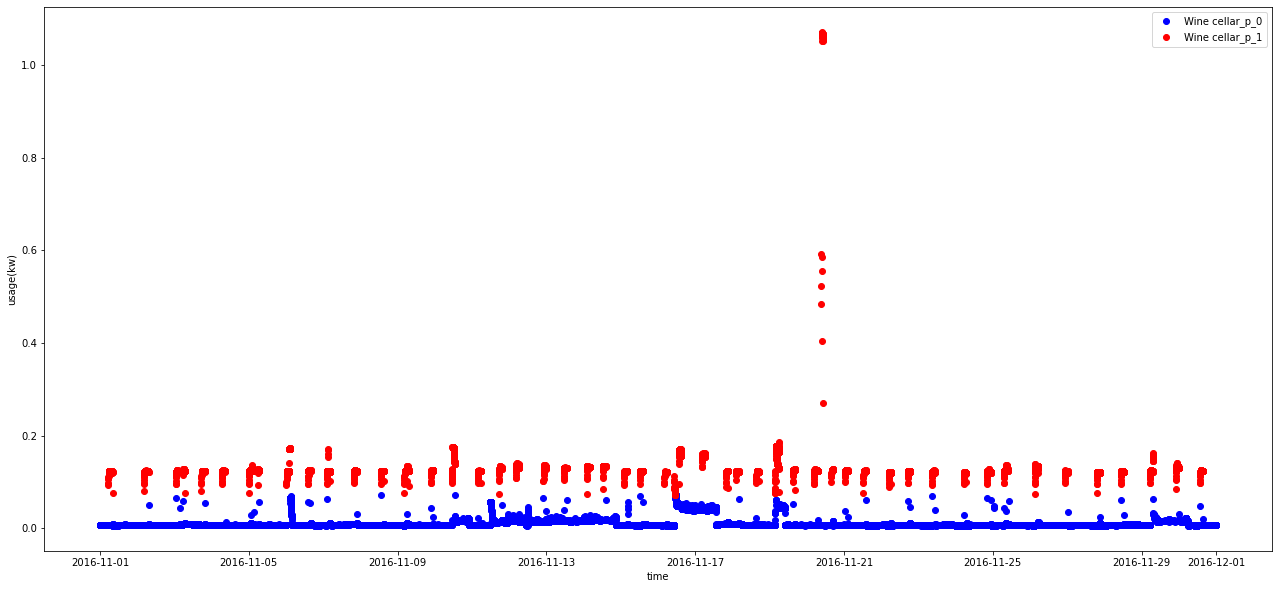

In [21]:
for col in cols:
    series_spec = df_p[col] # 특정 기기 추출
    series_fit = series_spec.values.reshape(-1,1) # model input을 위한 포맷 세팅
    
    # Clustering train 및 predict
    y_pred = model.fit_predict(series_fit)
    
    y_pred_dict[col] = y_pred
    
    # 각 군집의 center 값 확인
    print(f'{col}_cluster_center {model.cluster_centers_}')
    
    # series -> dataframe
    df_spec = series_spec.to_frame(name=col)
    
    # clustering label 삽입
    df_spec['cluster'] = y_pred
    
    # 특정 일자 데이터 추출
    # df_spec_time = df_spec[(day_1):(day_1*2)]
    
    # cluster index 추출
    # label_0 = df_spec_time.loc[df_spec_time.cluster==0].index
    # label_1 = df_spec_time.loc[df_spec_time.cluster==1].index
    
    label_0 = df_spec.loc[df_spec.cluster==0].index
    label_1 = df_spec.loc[df_spec.cluster==1].index
    
    # 시각화
    fig, ax = plt.subplots(figsize=(22, 10))
    # ax.plot_date(label_0, df_spec_time[col][label_0], label=f'{col}_0', c='blue')
    # ax.plot_date(label_1, df_spec_time[col][label_1], label=f'{col}_1', c='red')
    ax.plot_date(label_0, df_spec[col][label_0], label=f'{col}_0', c='blue')
    ax.plot_date(label_1, df_spec[col][label_1], label=f'{col}_1', c='red')
    plt.xlabel("time")
    plt.ylabel("usage(kw)")
    ax.legend()